In [13]:
from matplotlib import pyplot as plt
import os

os.environ['PROJ_LIB'] = 'C:/Users/Harrison/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

from astropy.table import Table

Early Lockdown Data - March 25th
https://www.nbcnews.com/health/health-news/here-are-stay-home-orders-across-country-n1168736


Late Lockdown Data - June 2nd
https://www.businessinsider.com/us-map-stay-at-home-orders-lockdowns-2020-3

(Some might notice I chose not to add Wyoming to the "late loWyoming is not included because it was only a "partial lockdown", and the population under lockdown was multiple orders of magnitudes lower than the other states)


For the plotting, I used this lovely guide from StackOverflow, modified to fix some bugs.
https://stackoverflow.com/questions/7586384/color-states-with-pythons-matplotlib-basemap



In [6]:
state_data = Table.read("us-governors.csv", format="csv")

print(state_data.colnames)

['state_name', 'state_name_slug', 'state_code', 'state_code_slug', 'votesmart', 'title', 'party', 'name', 'name_slug', 'first_name', 'middle_name', 'last_name', 'name_suffix', 'goes_by', 'pronunciation', 'gender', 'ethnicity', 'religion', 'openly_lgbtq', 'date_of_birth', 'entered_office', 'term_end', 'biography', 'phone', 'fax', 'latitude', 'longitude', 'address_complete', 'address_number', 'address_prefix', 'address_street', 'address_sec_unit_type', 'address_sec_unit_num', 'address_city', 'address_state', 'address_zipcode', 'address_type', 'website', 'contact_page', 'facebook_url', 'twitter_handle', 'twitter_url', 'photo_url']


In [94]:
early, late = [], []

not_early_lockdowns = ["ND", "SD", "NE", "IA", "AR"]
late_lockdowns = ["CA", "OR", "WA", "IL", "NY", "NJ", "VA"]

for row in state_data[:]:
    state_code = row["state_code"]
    
    early_lockdown = True if state_code not in not_early_lockdowns else False
    late_lockdown = True if state_code in late_lockdowns else False
        
    early.append(early_lockdown)
    late.append(late_lockdown)
    
state_data["EARLY"] = early
state_data["LATE"] = late

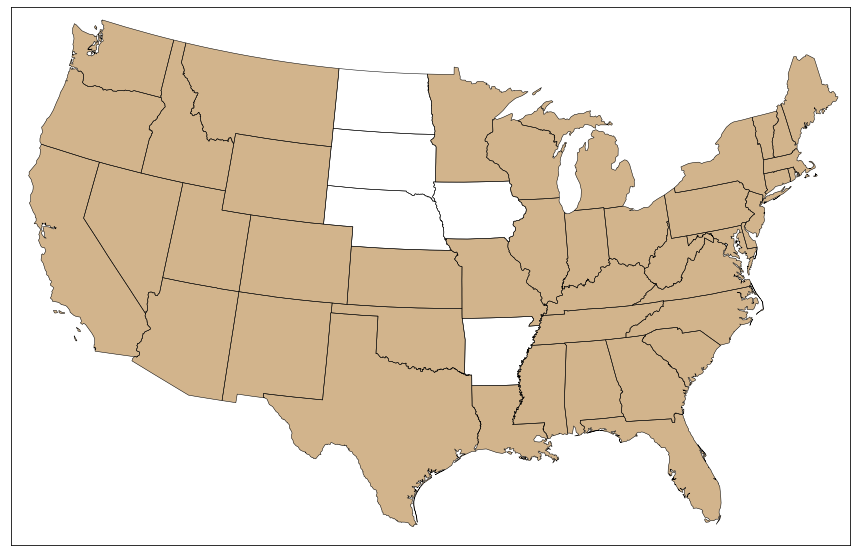

In [101]:
# create the map

fig = plt.figure(figsize=(12, 8))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile("states", name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['STATE_NAME'])
ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon



for row in state_data[:]:
       
    if row["EARLY"] == False:
        continue
    
    state_name = row["state_name"]
    
    for i in range(0, len(state_names)):
        if state_names[i] == state_name:
            seg = map.states[i]
            poly = Polygon(seg, facecolor='tan')
            ax.add_patch(poly)

plt.tight_layout()
plt.savefig("early_lockdowns.png", dpi=150)

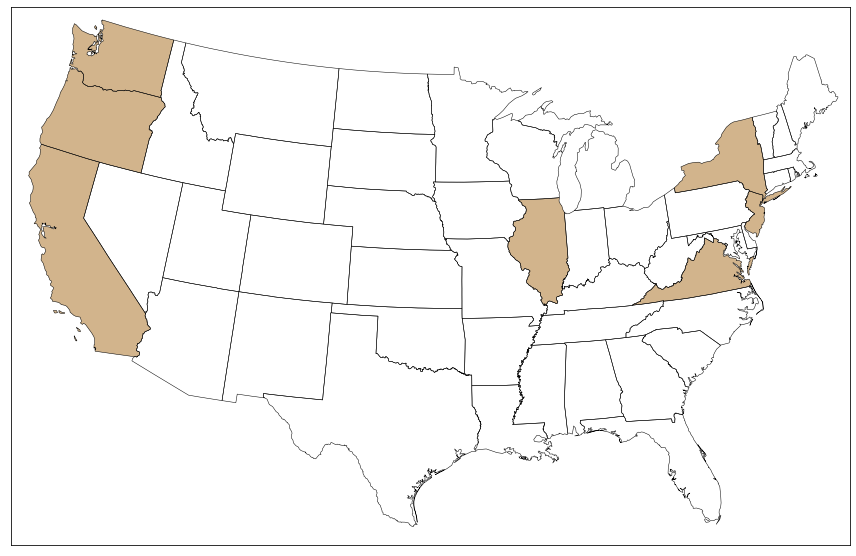

In [100]:
# create the map

fig = plt.figure(figsize=(12, 8))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile("states", name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['STATE_NAME'])
ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon



for row in state_data[:]:
       
    if row["LATE"] == False:
        continue
    
    state_name = row["state_name"]
    
    for i in range(0, len(state_names)):
        if state_names[i] == state_name:
            seg = map.states[i]
            poly = Polygon(seg, facecolor='tan')
            ax.add_patch(poly)

plt.tight_layout()
plt.savefig("late_lockdowns.png", dpi=150)

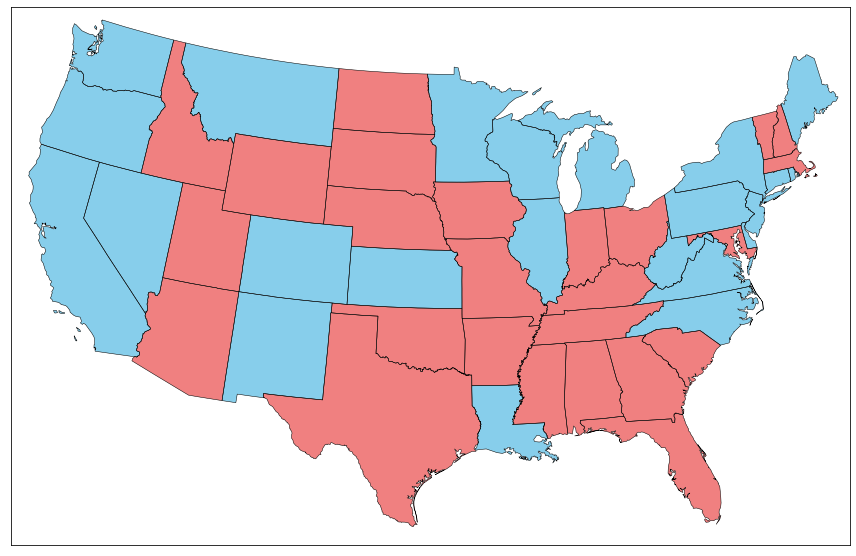

In [102]:
# create the map

fig = plt.figure(figsize=(12, 8))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile("states", name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['STATE_NAME'])
ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon



for row in state_data[:]:
    
    c = "green"
    if row["party"] == "democrat":
        c = "skyblue"
    elif row["party"] == "republican":
        c = "lightcoral"
    
    
    state_name = row["state_name"]
    
    for i in range(0, len(state_names)):
        if state_names[i] == state_name:
            seg = map.states[i]
            poly = Polygon(seg, facecolor=c)
            ax.add_patch(poly)

plt.tight_layout()
plt.savefig("political leanings.png", dpi=150)